## Setup the environment 

* **Packages needed to be installed**:
    * numpy
    * matplotlib
    * cv2 
    * pyTorch
    * PIL

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

sys.path.append(os.path.join(os.getcwd(),"scr"))
%matplotlib inline
os.getcwd()

'/Users/shijia/Documents/@UCSD/Courses/Spring2018/ECE285-ML/Project/Github_repo/Neural-Style-Transfer'

### Organization
 
```
-- slow-style-transfer (Gatys' Method)
    -- scr
       -- slowStyleTransfer.py
-- fast-style-transfer (Johnson's Method + Ulyanov's Instance Normalization)
    -- scr
       -- fastStyleTransfer.py (Select between fast-style-transfer and live-style-transfer)
       -- imageTransformNet.py
       -- vgg16.py
       -- vgg19.py
    -- models (The trained model for each style)
-- dataset
    -- 101_ObjectCategories
-- imgs
    -- content-image
    -- style-image
    -- result-image
-- live-style-transfer-demo.mp4
-- style_transfer.ipynb              
```

## Slow Style Transfer (Gatys' Method)

* Parameters for training *(Bolded parameters are required)*:
    * **content_path**: The directory for the content image. (For best performance, use image with same length and width)
    * **style_path**: The directory for style image.
    * **output_path**: The directory for the output stylized image.
    * num_steps: The number of iteration for optimization.
    * style_weight: The style weight.
    * content_weight: The content weight.

* **Available style images:**
    * inception.jpg
    * candy.jpg
    * wave.png
    * picasso.jpg

* ** Avaliable content images:**
    * beatles.jpg 
    * dancing.jpg
    * senna.jpg'

In [5]:
#---------------Select the style model----------------#
# Choose from 'candy.jpg', 'inception.jpg', 'wave.png', picasso.jpg
style_name = 'candy.jpg' 
#-------------Select the content image----------------#
# Choose from 'beatles.jpg', 'dancing.jpg', 'senna.jpg'
content_name = 'beatles.jpg'

In [6]:
style_path = os.path.join(os.getcwd(), "imgs/style-image", style_name)
content_path = os.path.join(os.getcwd(), "imgs/content-image", content_name)
output_path = os.path.join(os.getcwd(), "imgs/result-image/slow_results/demo.jpg")

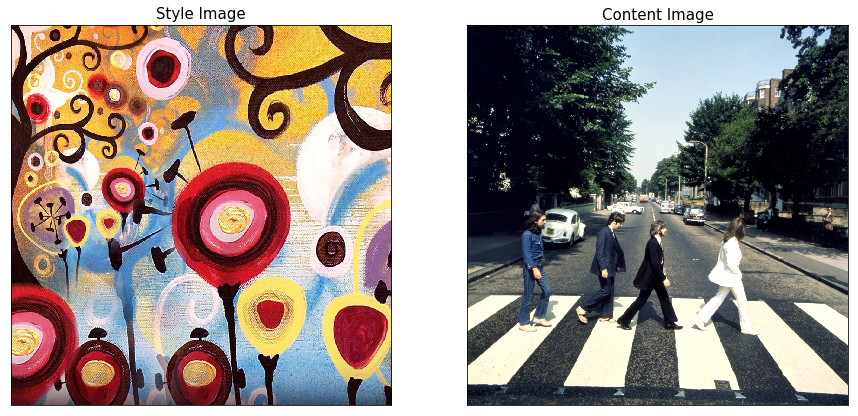

In [7]:
# To demonstrate the style and content image
img1 = Image.open(style_path)
img2 = Image.open(content_path)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img1)
plt.title('Style Image', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.title('Content Image', fontsize=15)
plt.show()

**The cell below requires approximately 1 mins to produce one stylized image on GPU.**

In [8]:
# This cell requires 1 mins to produce one stylized image.
!python slow-style-transfer/scr/slowStyleTransfer.py stylize --style-image $style_path --content-image $content_path --output-image $output_path
print('Stylization completed for {}.'.format(content_name))

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 596.078918 Content Loss: 42.923855

run [100]:
Style Loss : 212.437119 Content Loss: 47.906631

run [150]:
Style Loss : 125.317162 Content Loss: 50.105843

run [200]:
Style Loss : 81.894951 Content Loss: 51.396267

run [250]:
Style Loss : 60.037663 Content Loss: 51.903168

run [300]:
Style Loss : 46.757793 Content Loss: 51.989975

Stylization completed for beatles.jpg.


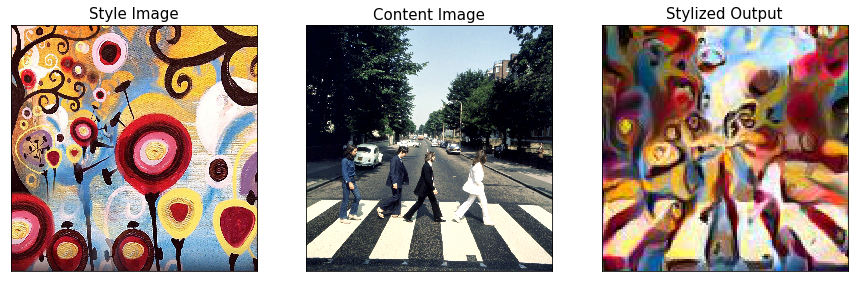

In [9]:
# To display the style, content and output stylized images.
img3 = Image.open(output_path)
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(img1)
plt.title('Style Image', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.title('Content Image', fontsize=15)
plt.subplot(133)
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.title('Stylized Output', fontsize=15)
plt.show()

## Fast Style Transfer
To use apply the desired stlye image onto the content, we first need to train our **Image Transform Network** for each specific stlye as showed below.
<img src="imgs/figs/model.png" style="max-width:100%; width: 70%">

### Train the style model (Image Transform Net)
* Parameters for training *(Bolded parameters are required)*:
    * **dataset_path**: The directory for the training dataset. (default: the Caltech 101 dataset)
    * **style_path**: The directory for style image.
    * **save_model_path**: The directory for saving the style model after training.
    * **epochs**: Number of epoches to run for generating the style model.
    * **cuda**: To run the model on 'CPU'(0) or 'GPU'(1).
    * normalization: Select between batch('Batch') and instance('Instance') normalization, default = 'Instance'.
    * vgg_model: Select between VGG16('vgg16') or VGG19('vgg19') pre-trained model for calculating loss, default = 'vgg16'.
    * lr: Learning Rate for optimization, default = 1e-3.
    * batch-size: The number of samples per batch, default = 4.
    * content-weight: The content weight, default = 1e5.
    * style-weight: The style weight, default = 1e10.
    * image-size: The size of images in training set, default = 256 x 255.
    * style-size: The size of the style image, default = original image size.

To get good stylized image, please only change the bolded parameters.
From our experiment, 3 epochs are good enough for generating a style model.

In [10]:
dataset_path = os.path.join(os.getcwd(), "dataset/101_ObjectCategories")
# To select the style image(.png or .jpg file)
style_path = os.path.join(os.getcwd(), "imgs/style-image/candy.jpg")
save_model_path = os.path.join(os.getcwd(), "fast-style-transfer/models")
epochs = 3
cuda = 0

**Note: The cell belows are used for training our style model. **

**Approximately need 15 mins for each epoch, in total 45 mins on GPU...**

**For demonstration purpose, please go to the [Stylize Content Image section] and directly use our trained style models (4 styles available)**

In [ ]:
# This cell might take up to 45 mins to train
# Start Training
!python fast-style-transfer/scr/fastStyleTransfer.py train --dataset $dataset_path --style-image $style_path --save-model-dir $save_model_path --epochs $epochs --log-interval 100 --cuda $cuda


### Stylize the content image
* Parameters for producing stylized image *(Bolded parameters are required)*:
    * **content_path**: The directory for content image.
    * **model_path**: The directory for saving the style model after training.
    * **save_path**: The directory to save the final stylized image.
    * **cuda**: To run the model on 'CPU'(0) or 'GPU'(1).
    * normalization: Follows the selection of training.
    * content-scale: The size scale for content image.

* **Available trained style models:**
    * **'candy'** : candy_model_IN_epoch3.model
    * **'inception'** : Inception_model_IN_epoch3.model
    * **'sketch'** : sketch_model_IN_epoch3.model
    * **'wave'** : wave_style_model_IN_epoch3.pth
    
* ** Avaliable content images:**
    * beatles.jpg 
    * dancing.jpg
    * geisel.jpg 
    * giraffe.jpg 
    * senna.jpg'

In [11]:
model_list = ['candy', 'inception', 'sketch', 'wave']
model_name_list = ['candy_model_IN_epoch3.model', 'Inception_model_IN_epoch3.model', 'sketch_model_IN_epoch3.model', 'wave_style_model_IN_epoch3.pth']
model_dict = dict(zip(model_list, model_name_list))
style_img_list = ['candy.jpg', 'inception.jpg', 'sketch.jpg', 'wave.png']
style_dict = dict(zip(model_list, style_img_list))
content_list = ['beatles', 'dancing', 'geisel', 'giraffe', 'senna']
content_dict = dict(zip(content_list, [item + '.jpg' for item in content_list]))

**Select the style model in cell below**

In [43]:
#---------------Select the style model----------------#
# Choose from 'candy', 'inception', 'sketch', 'wave'
model_name = 'sketch' 
#-------------Select the content image----------------#
# Choose from 'beatles', 'dancing', 'geisel', 'giraffe', 'senna'
content_name = 'geisel'

In [44]:
content_path = os.path.join(os.getcwd(), 'imgs/content-image', content_dict[content_name])
style_path = os.path.join(os.getcwd(), 'imgs/style-image', style_dict[model_name])
model_path = os.path.join(os.getcwd(), 'fast-style-transfer/models', model_dict[model_name])
save_file_name = 'test.jpg'
save_path = os.path.join(os.getcwd(), 'imgs/result-image/fast_results', save_file_name)
cuda = 0


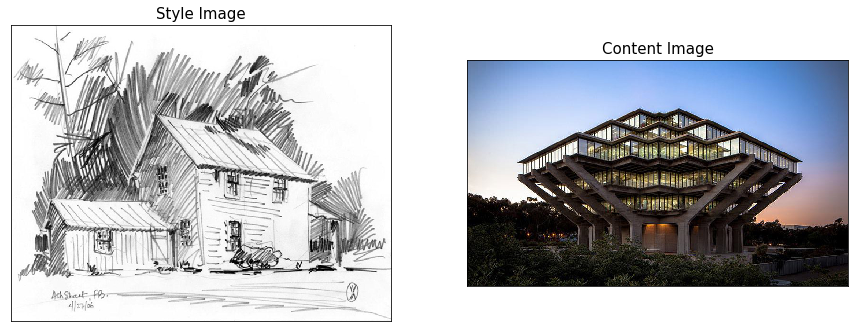

In [45]:
img1 = Image.open(style_path)
img2 = Image.open(content_path)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img1)
plt.title('Style Image', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.title('Content Image', fontsize=15)
plt.show()

Note: Approximately **less than 10 seconds** to run the cell below on GPU (stylization)

In [46]:
# To run the function for stylizing (10 seconds on GPU)
!python fast-style-transfer/scr/fastStyleTransfer.py eval --content-image $content_path --model $model_path --output-image $save_path --cuda $cuda
print('Stylization completed for {}.'.format(content_dict[content_name]))

Start stylize image . . .
Stylized output generated . . .
Stylization completed for geisel.jpg.


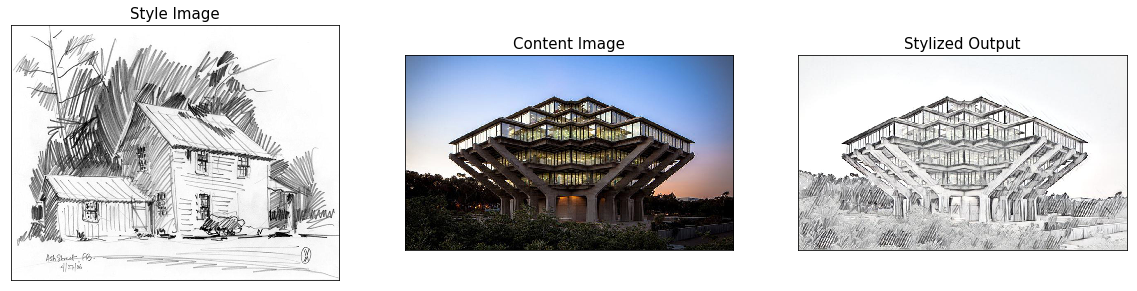

In [47]:
# To display the style, content and output stylized images.
img3 = Image.open(save_path)
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.imshow(img1)
plt.title('Style Image', fontsize=15)
plt.xticks([])
plt.yticks([])
plt.subplot(132)
plt.imshow(img2)
plt.xticks([])
plt.yticks([])
plt.title('Content Image', fontsize=15)
plt.subplot(133)
plt.imshow(img3)
plt.xticks([])
plt.yticks([])
plt.title('Stylized Output', fontsize=15)
plt.show()

## Live Style Transfer
**Notes:** Need to have an webcam ready to use (**Unable to be runned on UCSD DSMLP**)

We have included an video for demonstraing the functionality of our live-style-transfer in the main directory (live-style-tranfer-demo.mp4)

Enjoy!! [Live Style Transfer Demo](live-style-transfer-demo.mp4)

In [ ]:
# Not supposed to run this cell if no webcam available
!python fast-style-transfer/scr/fastStyleTransfer.py live --cuda $cuda --model $model_path


<h1><center>Final Results Demo</center></h1>
<img src="imgs/result-image/final_result.jpg" style="max-width:100%; width: 80%">